In [45]:
import re
import dateparser
from os import walk
from os.path import join as joinpath
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
import matplotlib.dates as mdates

In [46]:
def get_date (imyafayla):
    thisfiledate = re.match ('(\d{4}-\d\d-\d\d)', imyafayla).group(1)
    return dateparser.parse(thisfiledate)

    #date_string = file_kak_stroka.splitlines()[0]
    #parsed_date = dateparser.parse (date_string)
    #print (parsed_date)
    #print (type(parsed_date))

In [96]:
def plotter (vse_chastotnisti, daty):
    x_values = daty
    #print (x_values)
    y_values = vse_chastotnisti
    #print (y_values)
    ax = plt.gca()
    formatter = mdates.DateFormatter("%Y")# %Y-%m-%d
    ax.xaxis.set_major_formatter(formatter)
    locator = mdates.YearLocator()
    ax.xaxis.set_major_locator(locator)
    ax.set_xticklabels (daty)
    plt.xticks(rotation=45)
    plt.plot(x_values, y_values)

In [105]:
def advanced_plotter (vse_chastotnisti, daty):
    fig, ax = plt.subplots()
    ax.plot(daty, vse_chastotnisti)
    
    years = mdates.YearLocator()   # every year
    months = mdates.MonthLocator()  # every month
    years_fmt = mdates.DateFormatter('%Y')
    locator = mdates.YearLocator()
    
    ax.xaxis.set_major_locator(years)
    ax.xaxis.set_major_formatter(years_fmt)
    ax.xaxis.set_minor_locator(months)

    ax.format_xdata = mdates.DateFormatter('%Y-%m-%d')
    #ax.set_xticklabels(locator)
    fig.autofmt_xdate()
    plt.xticks(rotation=45)
    plt.show()
  

In [ ]:
def trash()  
    x_values = daty
    #print (x_values)
    y_values = vse_chastotnisti
    #print (y_values)
    ax = plt.gca()
    formatter = mdates.DateFormatter("%Y")
    ax.xaxis.set_major_formatter(formatter)
    locator = mdates.YearLocator()
    ax.xaxis.set_major_locator(locator)
    
    

    # format the ticks
    ax.xaxis.set_major_locator(years)
    ax.xaxis.set_major_formatter(years_fmt)
    ax.xaxis.set_minor_locator(months)

    # round to nearest years.
    datemin = np.datetime64(data['date'][0], 'Y')
    datemax = np.datetime64(data['date'][-1], 'Y') + np.timedelta64(1, 'Y')
    ax.set_xlim(datemin, datemax)

    # format the coords message box
    ax.format_xdata = mdates.DateFormatter('%Y-%m-%d')
    ax.format_ydata = lambda x: '$%1.2f' % x  # format the price.
    ax.grid(True)

    # rotates and right aligns the x labels, and moves the bottom of the
    # axes up to make room for them
    fig.autofmt_xdate()

    plt.show()

In [101]:
 ## будем считать упоминания слова в каждом тексте и делить на объем текста
def schitaem_chastotnosti_fulltext (iskomoe_slovo, put_k_faylam):
    vse_chastotnisti = []
    daty = []
    counter = 0 
    for path, dirs, filenames in walk (put_k_faylam):
        filenames.sort() ## чтобы открывались потом в хронологическом порядке, отсортируем по названию
        for filename in filenames:
            counter +=1
            if filename.endswith('.txt'): ## бывают еще всякие плохо видимые служебные файлы
                with open (joinpath(path, filename), 'r') as thisfile:
                    file_kak_stroka = thisfile.read()
                    date = get_date (filename)
                    daty.append (date)
                    tokenized_file = word_tokenize(file_kak_stroka)
                    chastota =  tokenized_file.count(iskomoe_slovo) ## у питоновских списков есть метод count, который позволяет посчитать число элементов
                    otn_chastota = chastota/len (tokenized_file)
                    vse_chastotnisti.append(otn_chastota)
            if counter % 100 == 0: 
                print (counter)
    
    advanced_plotter (vse_chastotnisti, daty)
   # plt.plot (vse_chastotnisti)
    #return (vse_chastotnisti)

100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800


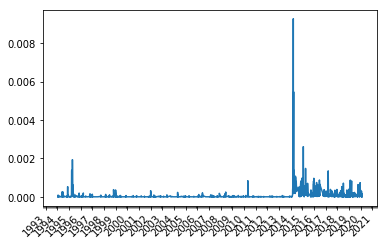

In [109]:
schitaem_chastotnosti_fulltext ('крым','renamed_lemmatized_duma') #'renamed_lemmatized_duma')